In [1]:
# !pip install missingno
# !pip install plotly

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from pandas.api.types import is_string_dtype
from matplotlib.colors import ListedColormap
import tensorflow as tf

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

# Understanding the data set


In [3]:
data = pd.read_csv('survey.csv')

In [4]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [5]:
data.shape

(1259, 27)

In [6]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

# Finding the missing values

In [10]:
Total = data.isnull().sum().sort_values(ascending = False)          
#finding total in percent
Percent = ((Total*100)/data.isnull().count()).sort_values(ascending = False)   
#making a table
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
comments,1095,86.973789
state,515,40.905481
work_interfere,264,20.969023
self_employed,18,1.429706
seek_help,0,0.000000
obs_consequence,0,0.000000
mental_vs_physical,0,0.000000
phys_health_interview,0,0.000000
mental_health_interview,0,0.000000
supervisor,0,0.000000


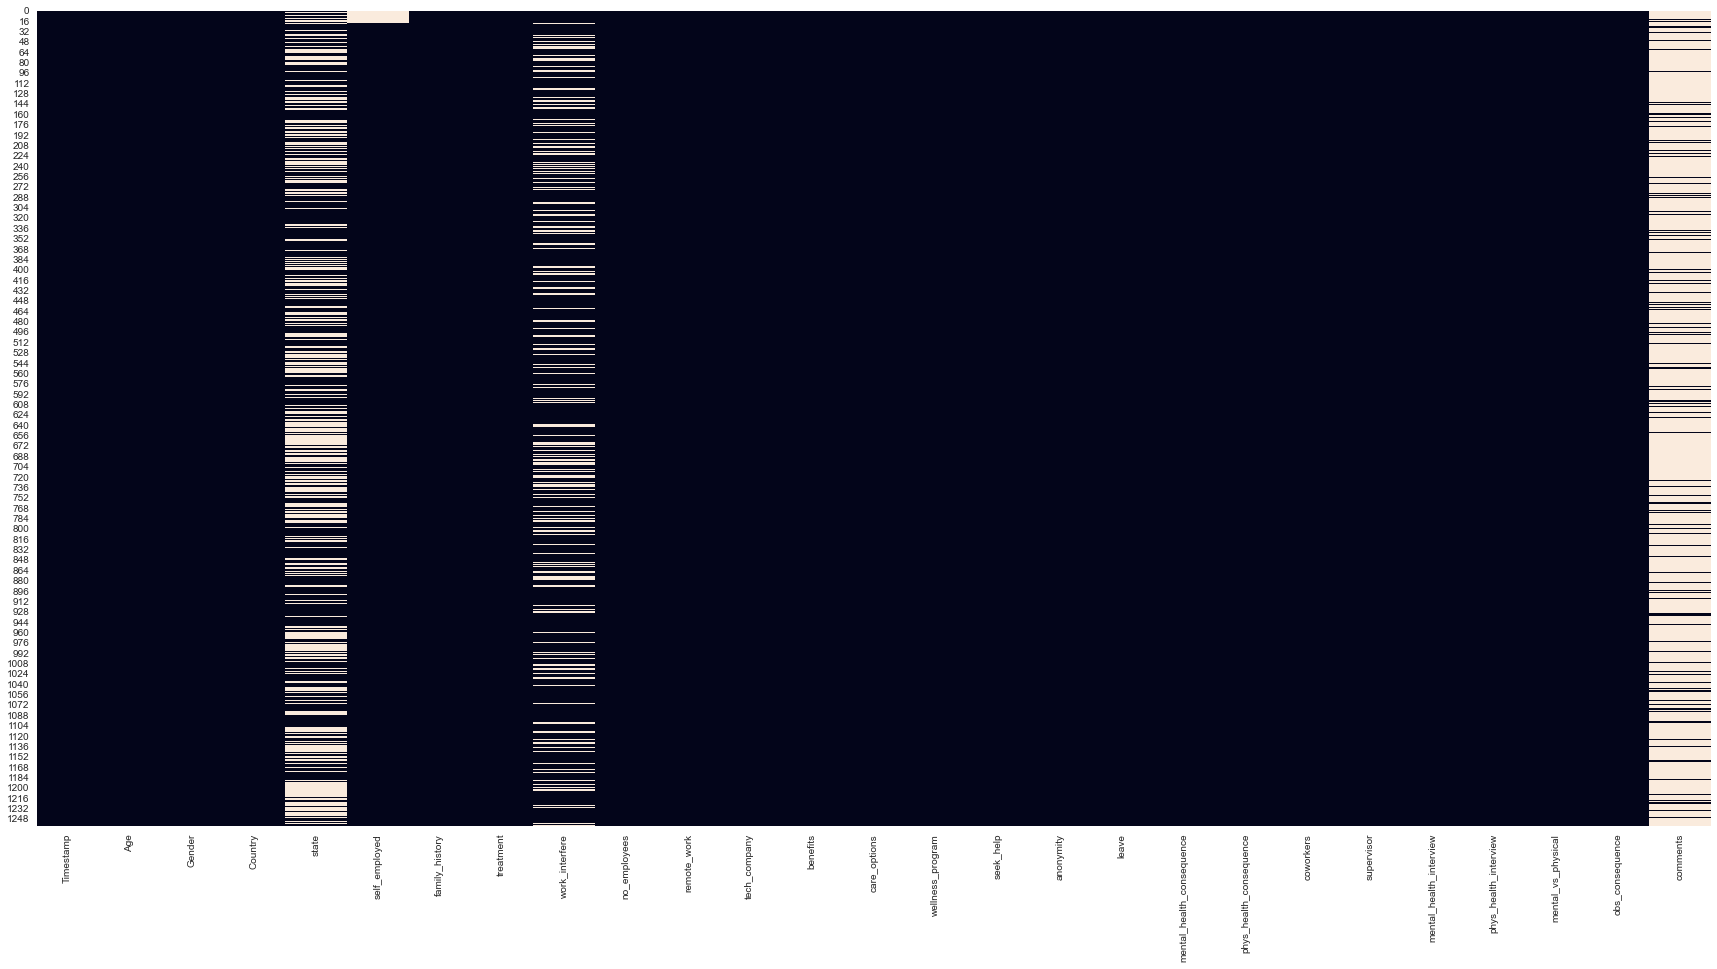

In [11]:
plt.figure(figsize=(30,15))
sns.heatmap(data.isnull(), cbar=False)
# display the plot
plt.show()

# Handling the missing values

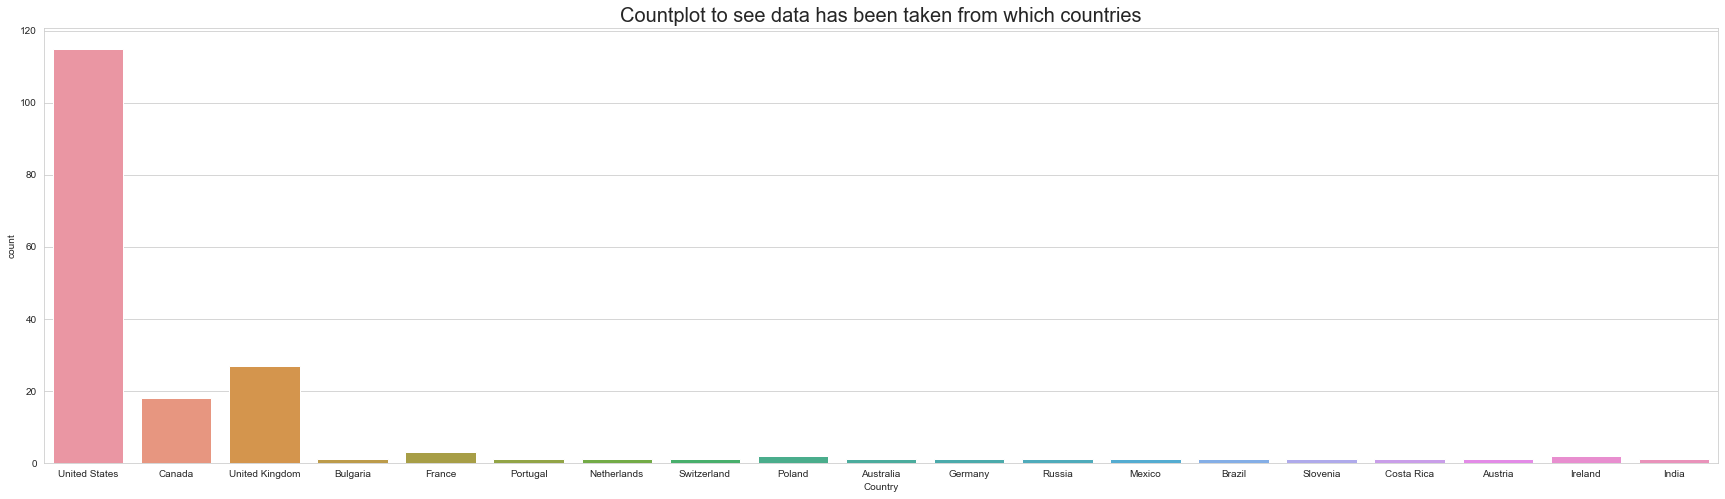

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [12]:
plt.figure(figsize=(30,8))
sns.countplot(data['Country'][:180])
plt.title("Countplot to see data has been taken from which countries",fontsize=20)
plt.show()
print(data['Country'].value_counts())

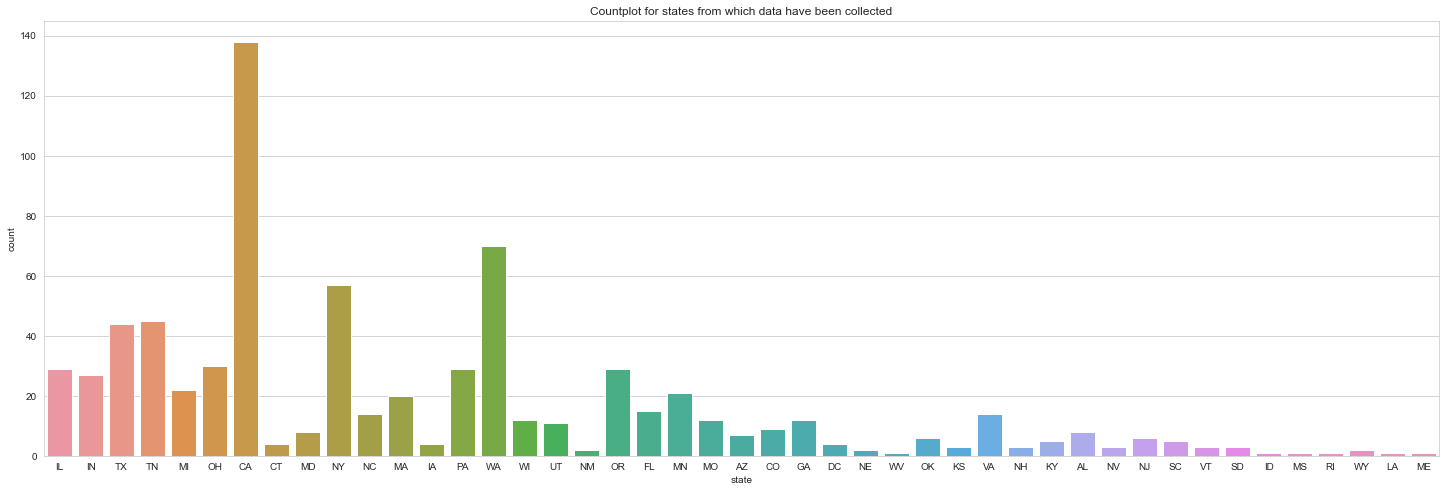

['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']


In [13]:
plt.figure(figsize=(25,8))
sns.countplot(data['state'])
plt.title("Countplot for states from which data have been collected")
plt.show()
print(data['state'].unique())

In [14]:
#dropping unnecessory collumn
data.drop(columns=['Country', 'state', 'comments','Timestamp'], inplace = True)

In [15]:
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

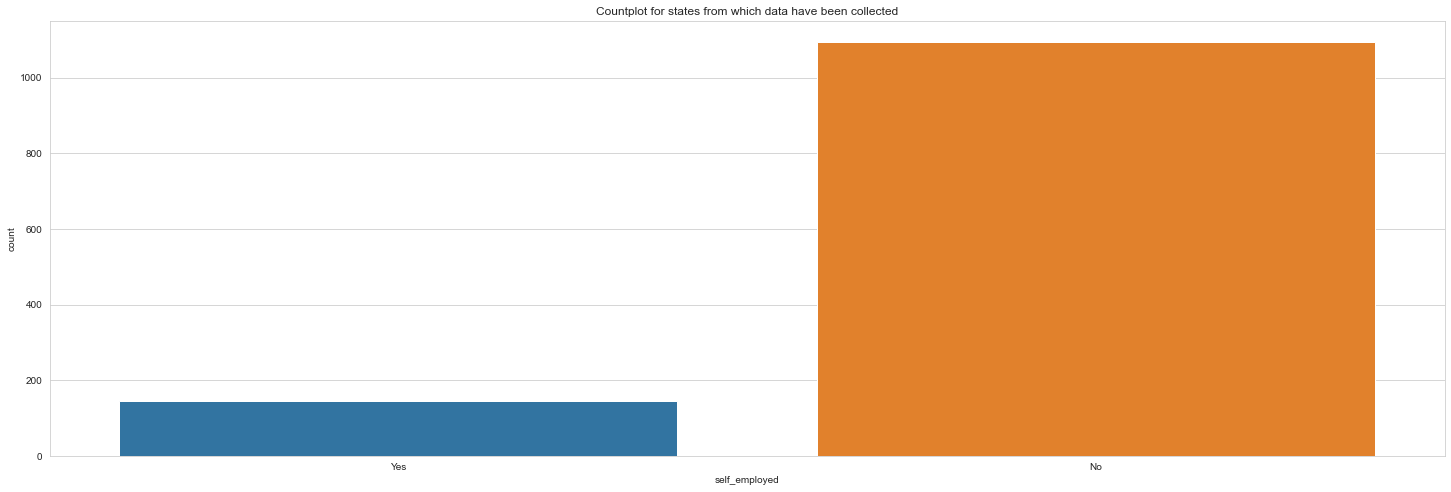

[nan 'Yes' 'No']


In [16]:
plt.figure(figsize=(25,8))
sns.countplot(data['self_employed'])
plt.title("Countplot for states from which data have been collected")
plt.show()
print(data['self_employed'].unique())

In [17]:
data['self_employed'].mode()

0    No
dtype: object

In [18]:
data['self_employed'] = data['self_employed'].fillna('No')

In [19]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

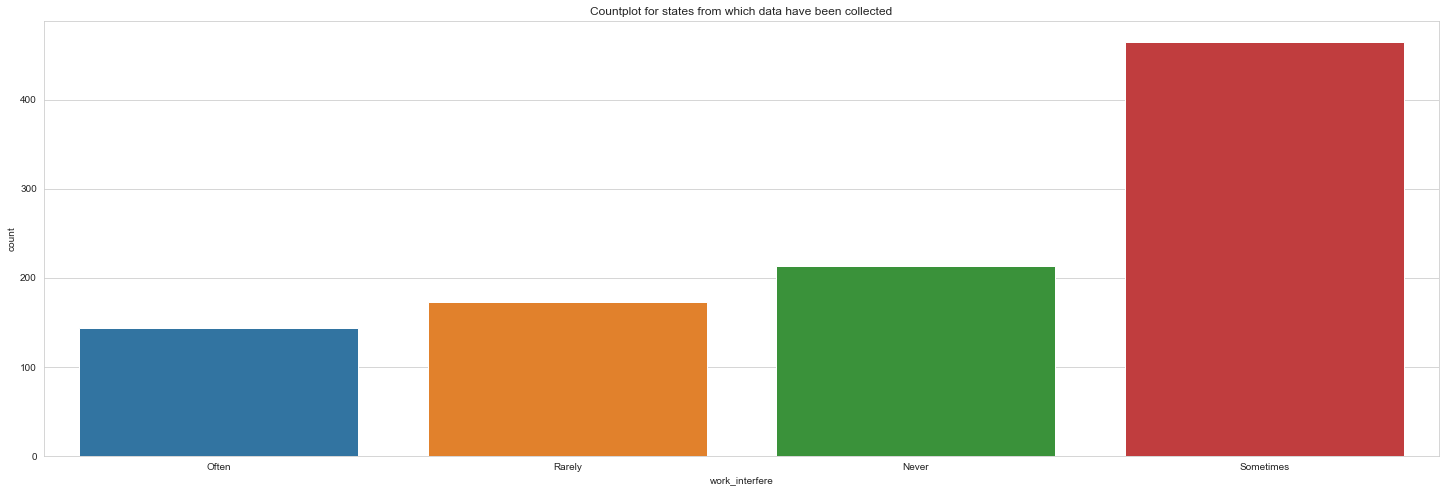

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [20]:
plt.figure(figsize=(25,8))
sns.countplot(data['work_interfere'])
plt.title("Countplot for states from which data have been collected")
plt.show()
print(data['work_interfere'].unique())

In [21]:
data['work_interfere'].mode()

0    Sometimes
dtype: object

In [22]:
data['work_interfere'] = data['work_interfere'].fillna('Don\'t know')

In [23]:
Total = data.isnull().sum().sort_values(ascending = False)          
#finding total in percent
Percent = ((Total*100)/data.isnull().count()).sort_values(ascending = False)   
#making a table
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Age,0,0.0
seek_help,0,0.0
mental_vs_physical,0,0.0
phys_health_interview,0,0.0
mental_health_interview,0,0.0
supervisor,0,0.0
coworkers,0,0.0
phys_health_consequence,0,0.0
mental_health_consequence,0,0.0
leave,0,0.0


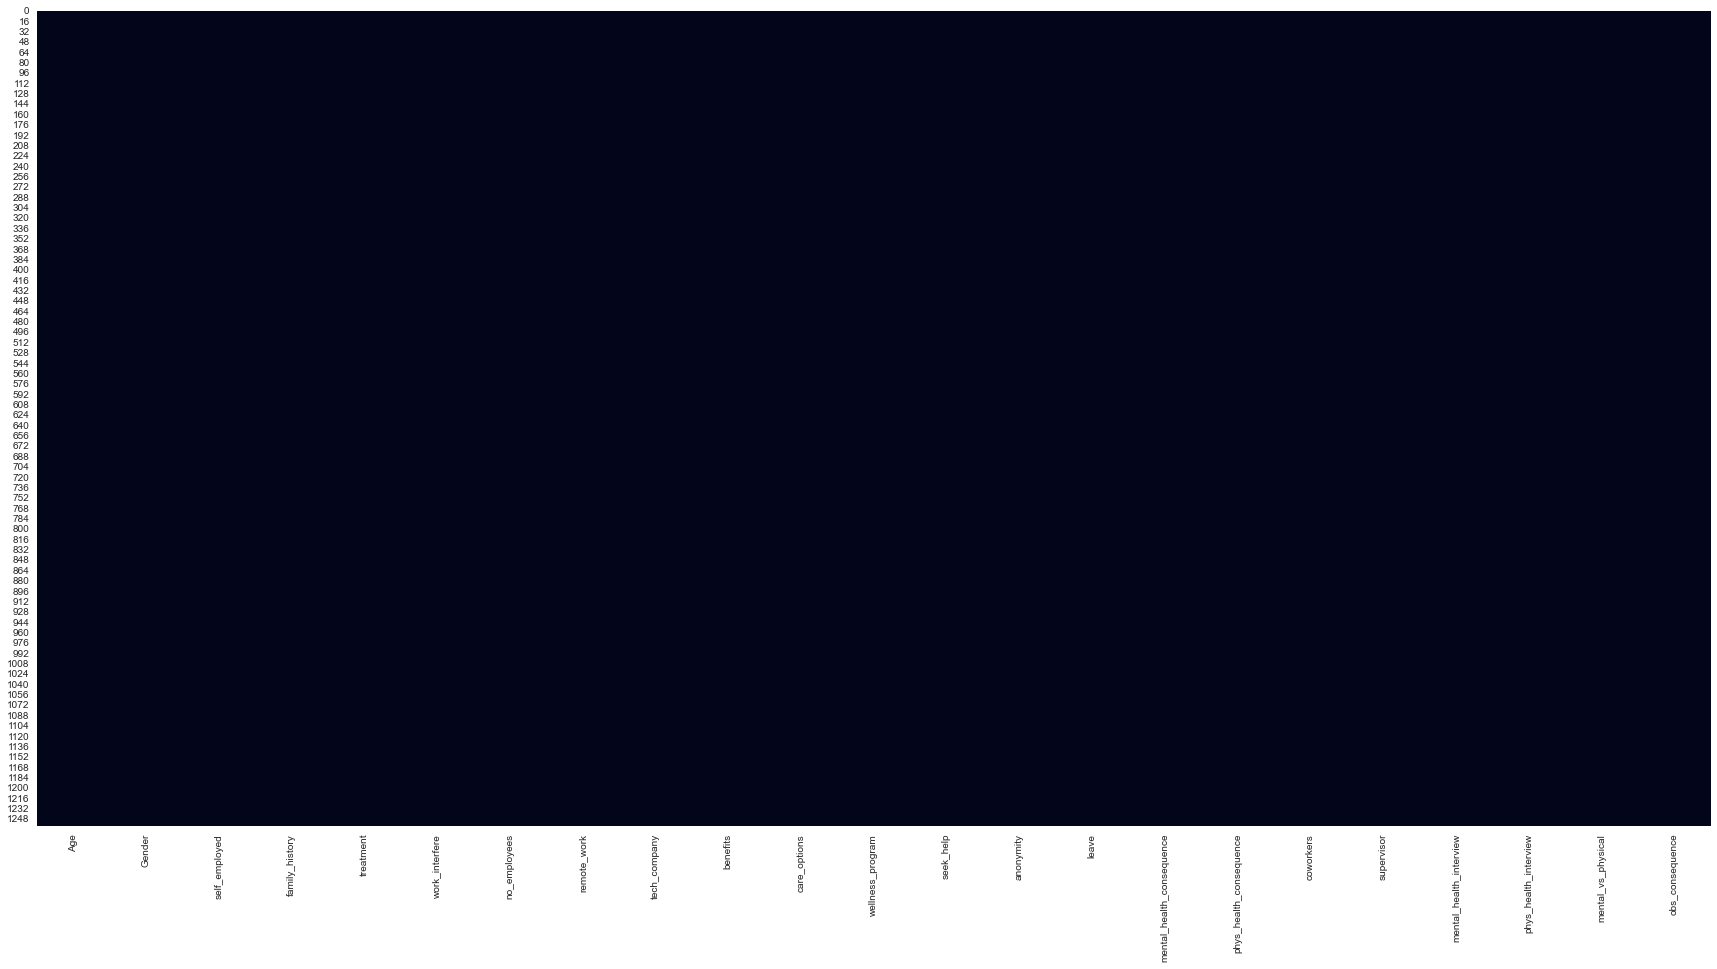

In [24]:
plt.figure(figsize=(30,15))
sns.heatmap(data.isnull(), cbar=False)
# display the plot
plt.show()

# Feature Engineering

In [25]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,Don't know,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,Don't know,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [26]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 49,
 'self_employed': 2,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 5,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

In [27]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'self_employed': ['No', 'Yes'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
 'no_employees': ['6-25',
  'More than 1000',
  '26-100',
  '100-500',
  '1-5',
  '500-1000'],
 'remote_work': ['No', 'Ye

In [28]:
print("The dataset contains different age groups including: \n")
print(data['Age'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [29]:
data.drop(data[data['Age'] < 0].index, inplace = True) 
data.drop(data[data['Age'] > 100].index, inplace = True)
data['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [30]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [31]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [32]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,1,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,1,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,1,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,1,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,No,No,Yes,Don't know,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,1,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,1,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,0,No,No,No,Don't know,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


# Exploratory Data analysis
 

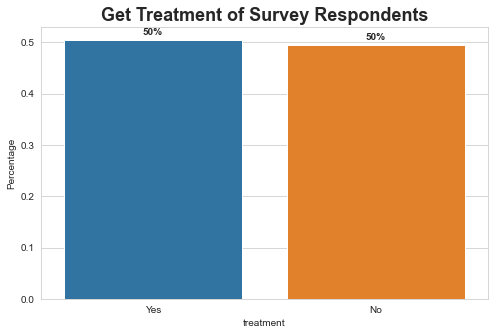

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = data['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10) )
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

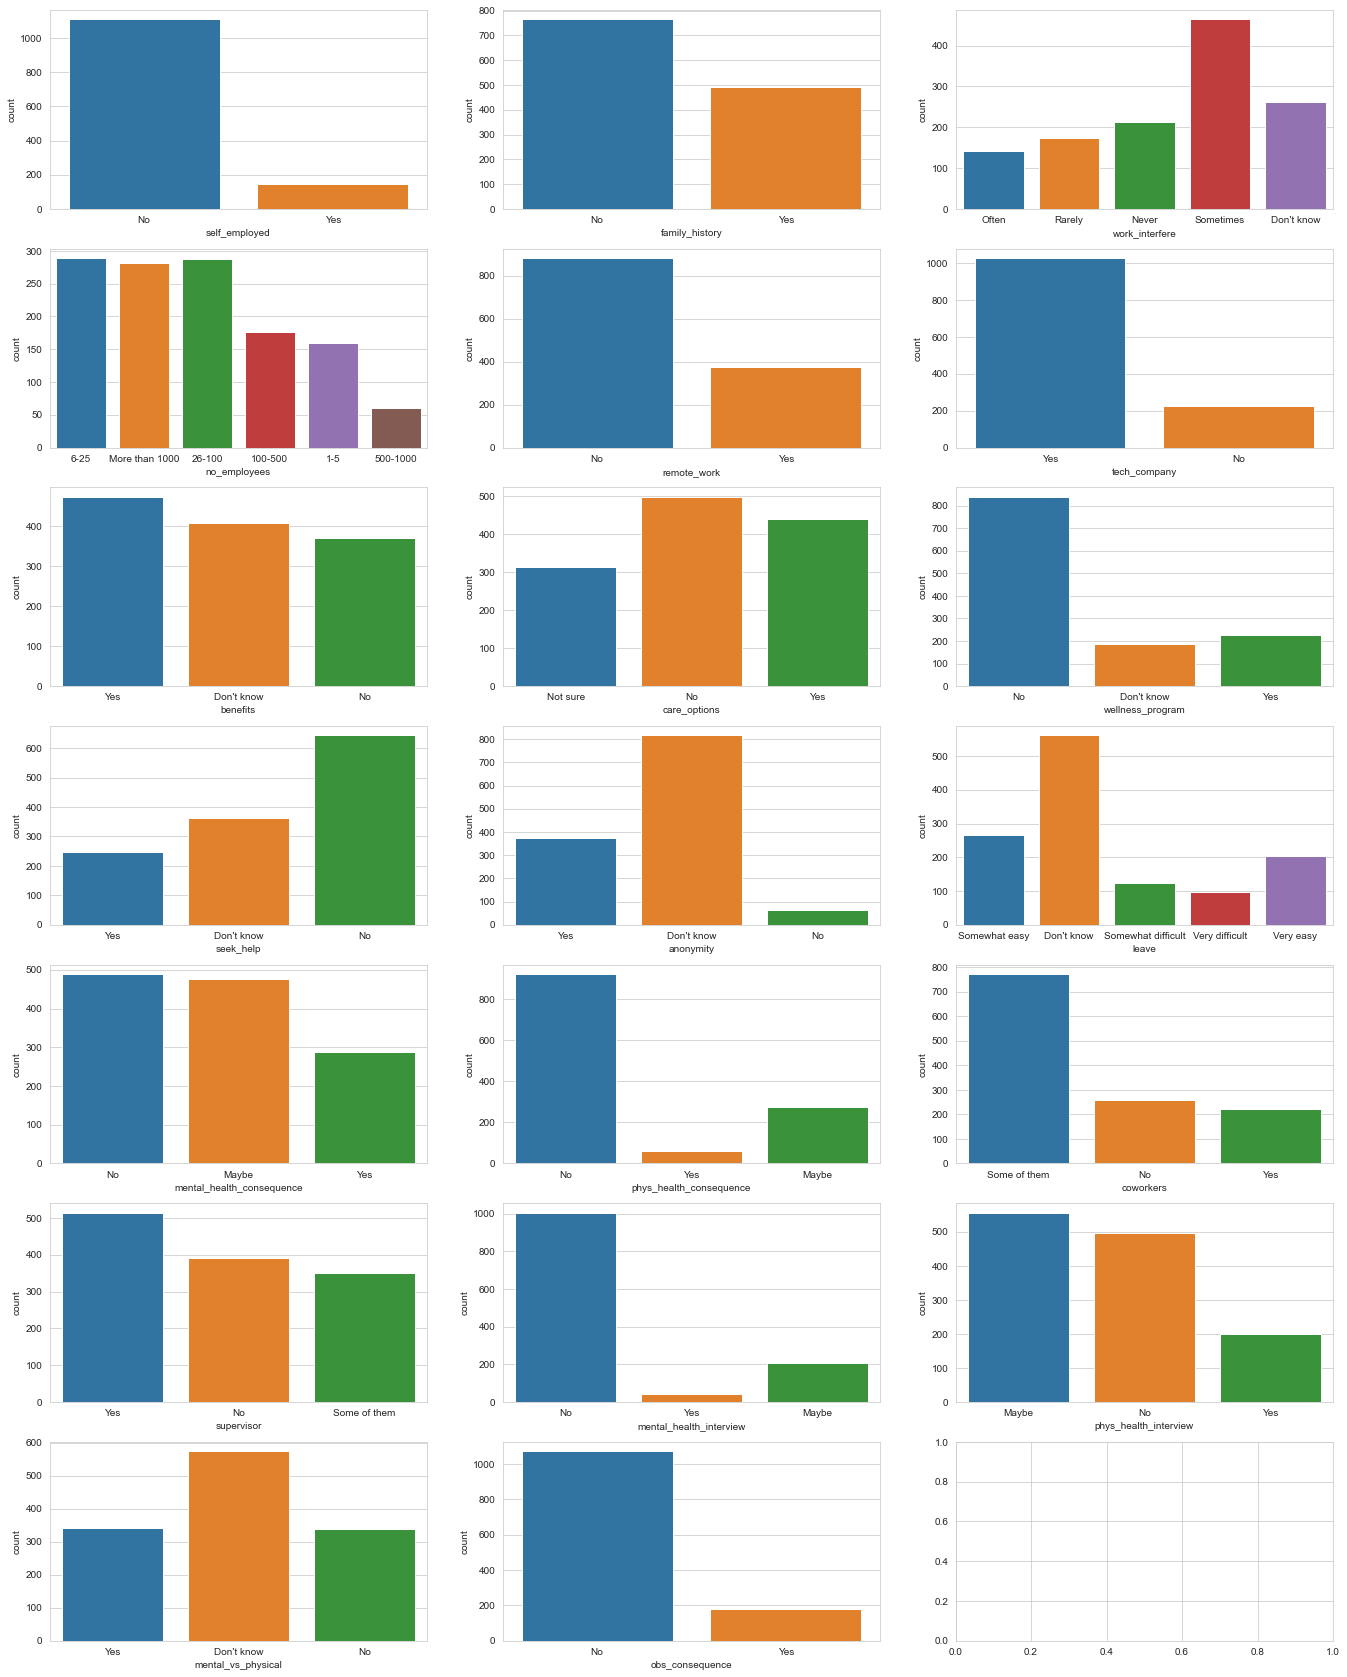

In [34]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in data:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(data[column]):
        if column!="treatment":
        # append the variables with 'categoric' data type in the list 'categorical'
             categorical.append(column)


# plot the count plot for each categorical variable 
fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize=(23, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    sns.countplot(data[variable], ax = subplot)

# display the plot
plt.show()

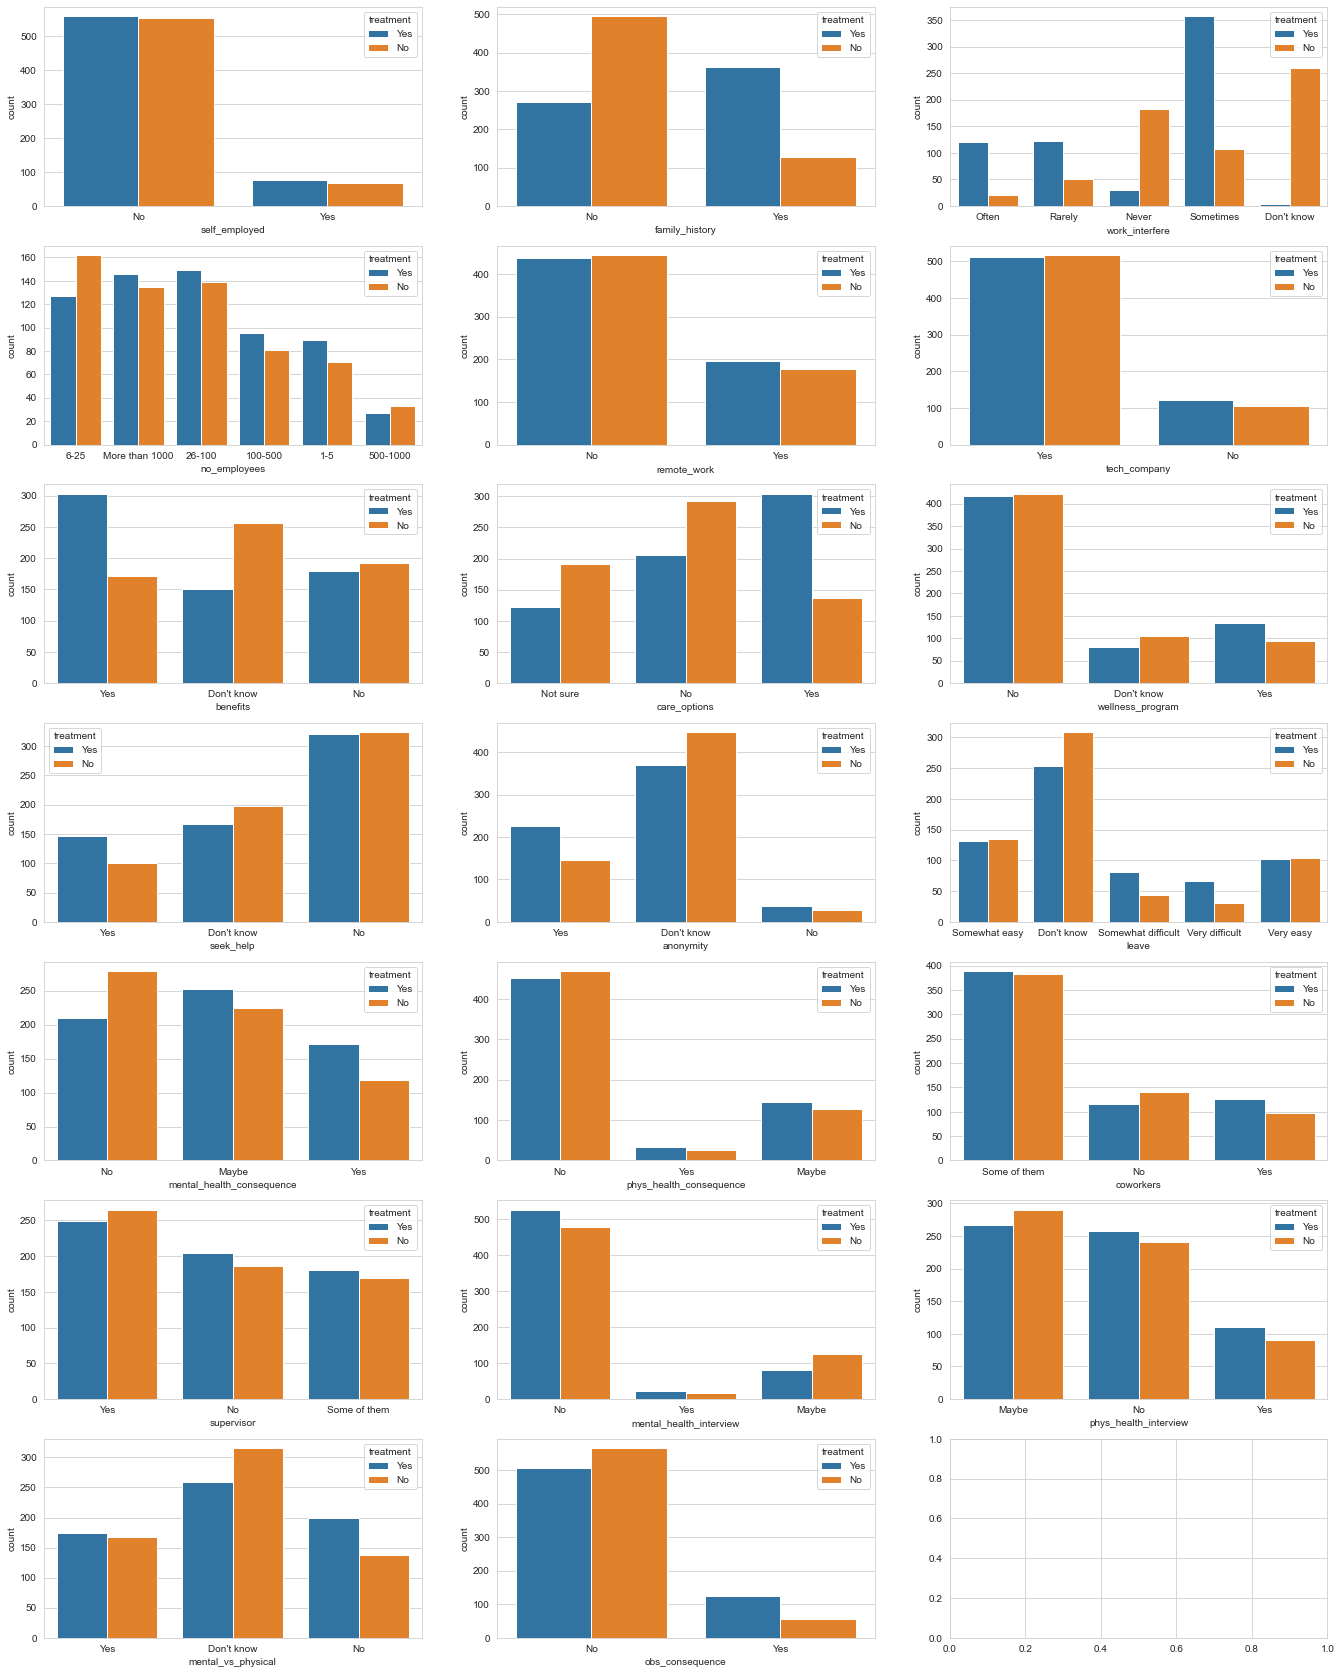

In [35]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in data:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(data[column]):
        if column != "treatment":
        # append the variables with 'categoric' data type in the list 'categorical'
             categorical.append(column)


# plot the count plot for each categorical variable 
fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize=(23, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    sns.countplot(data[variable], hue = data['treatment'] ,ax = subplot)

# display the plot
plt.show()

# Data Preparation

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   int64 
 2   self_employed              1254 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             1254 non-null   object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave   

In [37]:
data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [38]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),data[col].unique()))
    

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :[0 1 2] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTERVIEW :['Maybe' 'N

In [39]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(data[col])
    data[col] = label_encoder.transform(data[col])

In [40]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,22,0,0,0,1,2,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,29,1,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,17,1,0,0,0,3,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,16,1,0,1,1,2,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,16,1,0,0,0,1,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,11,1,0,0,1,0,2,0,1,1,0,1,1,0,2,1,1,1,1,1,1,0,0
1255,17,1,0,1,1,2,2,1,1,2,2,1,1,2,1,1,1,1,2,1,1,2,0
1256,19,1,0,1,1,4,5,0,1,2,2,1,1,0,1,2,2,0,0,1,1,1,0
1257,31,0,0,0,0,0,1,1,1,1,2,1,1,0,0,2,1,0,0,1,1,1,0


In [41]:
data['treatment'].value_counts()

1    633
0    621
Name: treatment, dtype: int64

# Evaluating Models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [43]:
from sklearn.model_selection import train_test_split
name=['LogisticRegression','KNN','BNB','NB','Decision Tree','SVM','RandomForest','Voting']
acc=[]
X = data.drop('treatment', axis = 1)
y = data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

features = list(X_train.columns)

In [44]:
features

['Age',
 'Gender',
 'self_employed',
 'family_history',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [45]:
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="Greens", cbar = False, 
                linewidths = 0.1, annot_kws = {'size':20})

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

In [46]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                    'f1-score'])

def update_score_card(model_name):
    
    global score_card

    score_card = score_card.append({'Model': model_name,
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

# LogisticRegression 

In [47]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

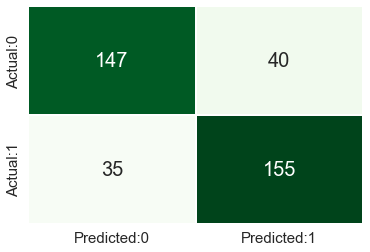

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       187
           1       0.79      0.82      0.81       190

    accuracy                           0.80       377
   macro avg       0.80      0.80      0.80       377
weighted avg       0.80      0.80      0.80       377



In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
plot_confusion_matrix(log_reg)
print(classification_report(y_test,y_pred))

In [49]:
param_grid={
    'penalty':['l1', 'l2', 'elasticnet'],
    'C':[1,2,3,4,5],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [50]:
cv= GridSearchCV(log_reg, param_grid = param_grid, cv = 5,scoring='accuracy')
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [51]:
cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [52]:
y_pred=cv.predict(X_test)
auc=accuracy_score(y_test,y_pred)
acc.append(auc)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       180
           1       0.82      0.79      0.81       197

    accuracy                           0.80       377
   macro avg       0.80      0.80      0.80       377
weighted avg       0.80      0.80      0.80       377



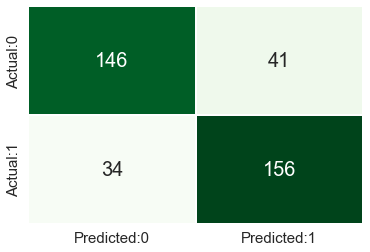

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegression,0.791878,0.821053,0.801061,0.806202


In [53]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(cv)
update_score_card(model_name='LogisticRegression')

# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

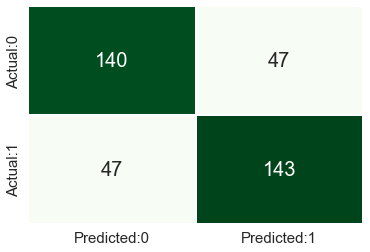

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       187
           1       0.75      0.75      0.75       190

    accuracy                           0.75       377
   macro avg       0.75      0.75      0.75       377
weighted avg       0.75      0.75      0.75       377



In [57]:
plot_confusion_matrix(knn)
print(classification_report(y_test,y_pred))

### Choosing a K Value

In [58]:
accuracy_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_rate.append(np.mean(pred_i == y_test))
    

In [59]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Accuracy Rate')

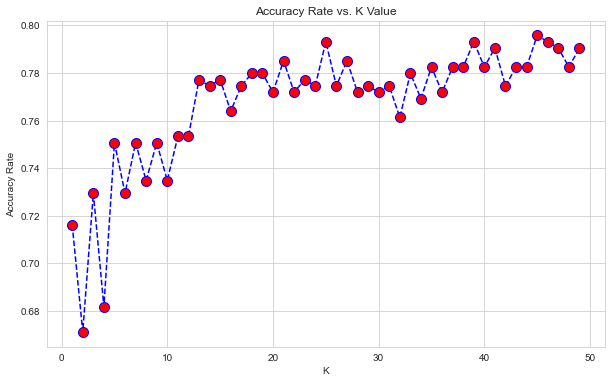

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')


Text(0, 0.5, 'Error Rate')

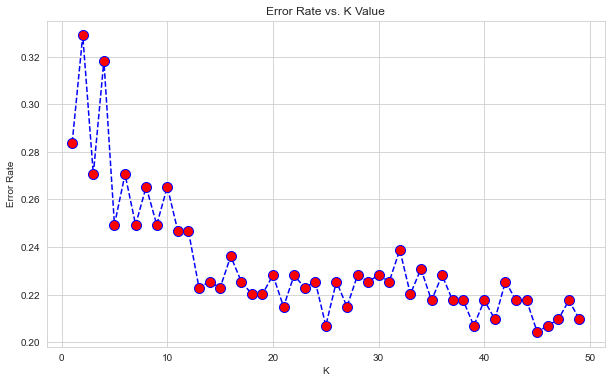

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

WITH K=45
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       187
           1       0.77      0.85      0.81       190

    accuracy                           0.80       377
   macro avg       0.80      0.80      0.79       377
weighted avg       0.80      0.80      0.80       377



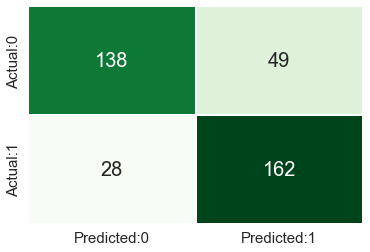

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegression,0.791878,0.821053,0.801061,0.806202
1,KNN,0.767773,0.852632,0.795756,0.807980


In [62]:
knn = KNeighborsClassifier(n_neighbors=45)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
auc=accuracy_score(y_test,y_pred)
acc.append(auc)
print('WITH K=45')
print(classification_report(y_test,y_pred))
plot_confusion_matrix(knn)
update_score_card(model_name='KNN')

# Multivariate Bernoulli

In [63]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
bnb = BernoulliNB()

In [64]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
auc=accuracy_score(y_test,y_pred)
acc.append(auc)

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       187
           1       0.75      0.76      0.75       190

    accuracy                           0.75       377
   macro avg       0.75      0.75      0.75       377
weighted avg       0.75      0.75      0.75       377



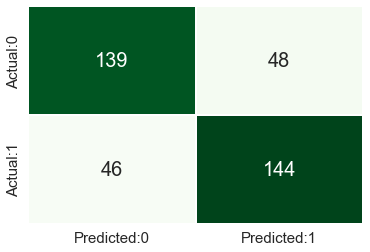

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegression,0.791878,0.821053,0.801061,0.806202
1,KNN,0.767773,0.852632,0.795756,0.807980
2,Multivariate Bernoulli,0.750000,0.757895,0.750663,0.753927


In [65]:
print(metrics.classification_report(y_test, y_pred))
plot_confusion_matrix(bnb)
update_score_card(model_name='Multivariate Bernoulli')

#  Multinomial

In [66]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
nb = MultinomialNB()

In [67]:
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
auc=accuracy_score(y_test,y_pred)
acc.append(auc)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       187
           1       0.77      0.84      0.80       190

    accuracy                           0.79       377
   macro avg       0.80      0.79      0.79       377
weighted avg       0.80      0.79      0.79       377



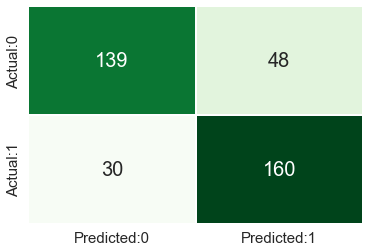

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegression,0.791878,0.821053,0.801061,0.806202
1,KNN,0.767773,0.852632,0.795756,0.807980
2,Multivariate Bernoulli,0.750000,0.757895,0.750663,0.753927
3,Multinomial,0.769231,0.842105,0.793103,0.804020


In [68]:
print(metrics.classification_report(y_test, y_pred))
plot_confusion_matrix(nb)
update_score_card(model_name='Multinomial')

# DECISION TREE

In [69]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_features':['auto', 'sqrt', 'log2'],
  'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
  'random_state':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [72]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19,
                                            20],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [73]:
cv.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'max_leaf_nodes': 13,
 'random_state': 37,
 'splitter': 'random'}

In [74]:
final1=cv.best_params_

In [75]:
y_pred=cv.predict(X_test)
auc=accuracy_score(y_test,y_pred)
acc.append(auc)

In [76]:
from sklearn.metrics import accuracy_score, classification_report

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       142
           1       0.94      0.76      0.84       235

    accuracy                           0.82       377
   macro avg       0.82      0.84      0.81       377
weighted avg       0.85      0.82      0.82       377



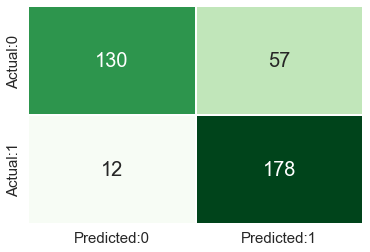

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegression,0.791878,0.821053,0.801061,0.806202
1,KNN,0.767773,0.852632,0.795756,0.807980
2,Multivariate Bernoulli,0.750000,0.757895,0.750663,0.753927
3,Multinomial,0.769231,0.842105,0.793103,0.804020
4,DecisionTree,0.757447,0.936842,0.816976,0.837647


In [77]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(treemodel)
update_score_card(model_name='DecisionTree')

In [78]:
dt=DecisionTreeClassifier(criterion= 'entropy',
 max_features= 'auto',
 max_leaf_nodes= 13,
 random_state= 37,
 splitter= 'random')
dt.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       max_leaf_nodes=13, random_state=37, splitter='random')

[Text(474.29999999999995, 504.7714285714286, 'X[4] <= 1.346\nentropy = 1.0\nsamples = 877\nvalue = [434, 443]'),
 Text(223.2, 427.11428571428576, 'X[3] <= 0.362\nentropy = 0.342\nsamples = 330\nvalue = [309, 21]'),
 Text(111.6, 349.4571428571429, 'X[4] <= 0.356\nentropy = 0.259\nsamples = 275\nvalue = [263, 12]'),
 Text(55.8, 271.8, 'entropy = 0.145\nsamples = 146\nvalue = [143, 3]'),
 Text(167.39999999999998, 271.8, 'X[2] <= 0.916\nentropy = 0.365\nsamples = 129\nvalue = [120, 9]'),
 Text(111.6, 194.14285714285717, 'entropy = 0.403\nsamples = 112\nvalue = [103, 9]'),
 Text(223.2, 194.14285714285717, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(334.79999999999995, 349.4571428571429, 'X[4] <= 0.447\nentropy = 0.643\nsamples = 55\nvalue = [46, 9]'),
 Text(279.0, 271.8, 'entropy = 0.201\nsamples = 32\nvalue = [31, 1]'),
 Text(390.59999999999997, 271.8, 'X[16] <= 1.429\nentropy = 0.932\nsamples = 23\nvalue = [15, 8]'),
 Text(334.79999999999995, 194.14285714285717, 'X[6] <= 0.445\

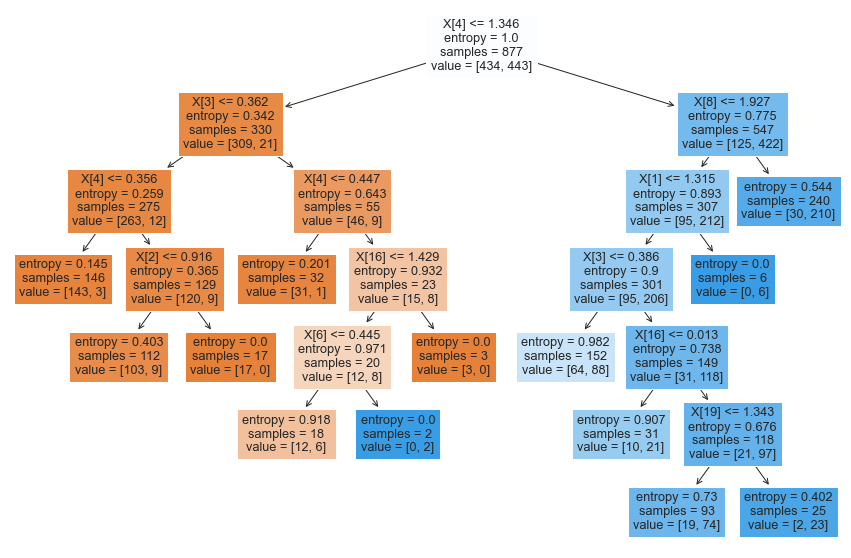

In [79]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

# SVM

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       163
           1       0.87      0.77      0.82       214

    accuracy                           0.80       377
   macro avg       0.80      0.81      0.80       377
weighted avg       0.81      0.80      0.80       377



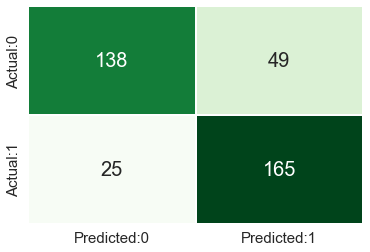

In [80]:
from sklearn.svm import SVC
svc1 = SVC(kernel='linear')
svc1.fit(X_train,y_train)
y_pred=svc1.predict(X_test)
print(classification_report(y_pred,y_test))
plot_confusion_matrix(svc1)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       162
           1       0.86      0.76      0.81       215

    accuracy                           0.80       377
   macro avg       0.80      0.80      0.79       377
weighted avg       0.80      0.80      0.80       377



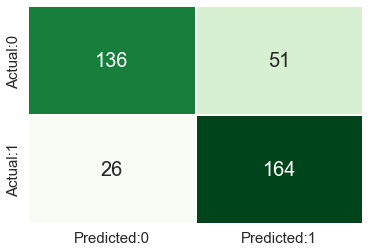

In [81]:
from sklearn.svm import SVC
svc2 = SVC(kernel='rbf')
svc2.fit(X_train,y_train)
y_pred=svc2.predict(X_test)
print(classification_report(y_pred,y_test))
plot_confusion_matrix(svc2)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       203
           1       0.73      0.79      0.76       174

    accuracy                           0.77       377
   macro avg       0.77      0.77      0.77       377
weighted avg       0.77      0.77      0.77       377



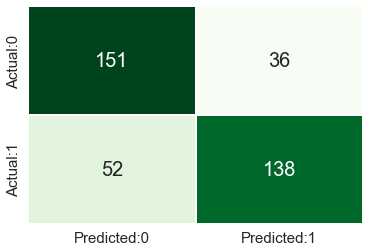

In [82]:
from sklearn.svm import SVC
svc3 = SVC(kernel='poly')
svc3.fit(X_train,y_train)
y_pred=svc3.predict(X_test)
print(classification_report(y_pred,y_test))
plot_confusion_matrix(svc3)

              precision    recall  f1-score   support

           0       0.48      0.47      0.48       191
           1       0.47      0.48      0.47       186

    accuracy                           0.47       377
   macro avg       0.47      0.47      0.47       377
weighted avg       0.47      0.47      0.47       377



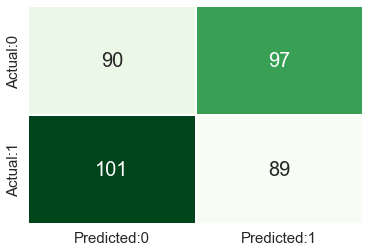

In [83]:
from sklearn.svm import SVC
svc4 = SVC(kernel='sigmoid')
svc4.fit(X_train,y_train)
y_pred=svc4.predict(X_test)
print(classification_report(y_pred,y_test))
plot_confusion_matrix(svc4)

In [84]:
param_distribs = {
        'kernel': ['linear', 'rbf','polynomial','sigmoid'],
        'degree': [1,2,3,4,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], 
        'gamma' : ['auto','scale' ],
        'C': [0.5, 1,1.5,2,2.5,3,3.5,4,0.001,0.1,0.01,0.3,1.2]    
    }
svc_grid = SVC()
CV = GridSearchCV(estimator= svc_grid, param_grid=param_distribs, scoring='accuracy', cv= 5)

In [85]:
CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 0.001, 0.1, 0.01,
                               0.3, 1.2],
                         'degree': [1, 2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15,
                                    16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'polynomial', 'sigmoid']},
             scoring='accuracy')

In [86]:
CV.best_params_

{'C': 0.001, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [87]:
y_pred=CV.predict(X_test)
auc=accuracy_score(y_test,y_pred)
acc.append(auc)

In [88]:
svc=SVC(C= 0.001, degree= 1, gamma= 'auto', kernel= 'linear')

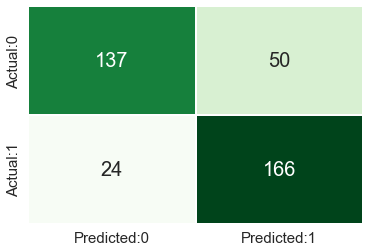

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       161
           1       0.87      0.77      0.82       216

    accuracy                           0.80       377
   macro avg       0.80      0.81      0.80       377
weighted avg       0.81      0.80      0.80       377



,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegression,0.791878,0.821053,0.801061,0.806202
1,KNN,0.767773,0.852632,0.795756,0.807980
2,Multivariate Bernoulli,0.750000,0.757895,0.750663,0.753927
3,Multinomial,0.769231,0.842105,0.793103,0.804020
4,DecisionTree,0.757447,0.936842,0.816976,0.837647
5,SVC,0.768519,0.873684,0.803714,0.817734


In [89]:
plot_confusion_matrix(svc_grid)
print(classification_report(y_pred,y_test))
update_score_card(model_name='SVC')

# RandomForest

In [90]:
param_grid = [
    {'n_estimators':[3,10,30,50,100],'max_features':[2,4,6,8],'max_depth' : [1,2,3,4]}
]



forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='accuracy')

In [91]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=4, max_features=4, n_estimators=30,
                       random_state=42)

In [92]:
final=grid_search.best_estimator_

In [93]:
y_pred=grid_search.predict(X_test)
auc=accuracy_score(y_test,y_pred)
acc.append(auc)

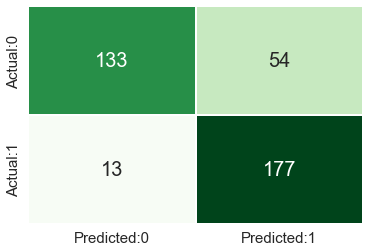

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       146
           1       0.93      0.77      0.84       231

    accuracy                           0.82       377
   macro avg       0.82      0.84      0.82       377
weighted avg       0.85      0.82      0.82       377



,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegression,0.791878,0.821053,0.801061,0.806202
1,KNN,0.767773,0.852632,0.795756,0.807980
2,Multivariate Bernoulli,0.750000,0.757895,0.750663,0.753927
3,Multinomial,0.769231,0.842105,0.793103,0.804020
4,DecisionTree,0.757447,0.936842,0.816976,0.837647
5,SVC,0.768519,0.873684,0.803714,0.817734
6,RandomForest,0.766234,0.931579,0.822281,0.840855


In [94]:
plot_confusion_matrix(forest_clf)
print(classification_report(y_pred,y_test))
update_score_card(model_name='RandomForest')

# Voting Classifier

In [95]:
from sklearn.ensemble import VotingClassifier

In [96]:
estimators = []
estimators.append(('KNN', knn))
estimators.append(('BNB', bnb))
estimators.append(('NB', nb))
estimators.append(('DT', dt))
estimators.append(('SVC', svc))
estimators.append(('RandomForest', forest_clf))

In [97]:
estimators

[('KNN', KNeighborsClassifier(n_neighbors=45)),
 ('BNB', BernoulliNB()),
 ('NB', MultinomialNB()),
 ('DT',
  DecisionTreeClassifier(criterion='entropy', max_features='auto',
                         max_leaf_nodes=13, random_state=37, splitter='random')),
 ('SVC', SVC(C=0.001, degree=1, gamma='auto', kernel='linear')),
 ('RandomForest', RandomForestClassifier(random_state=42))]

In [98]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators,voting='hard')
results = cross_val_score(ensemble, X, y, scoring='accuracy', cv=10)
# print(results)
print(results.mean())
acc.append(results.mean())

0.8237460317460318


# Conclusion

In [99]:
print(acc)

[0.8010610079575596, 0.7957559681697612, 0.7506631299734748, 0.7931034482758621, 0.8169761273209549, 0.8037135278514589, 0.8222811671087533, 0.8237460317460318]


Text(0.5, 1.0, 'Plotting the Model Accuracies')

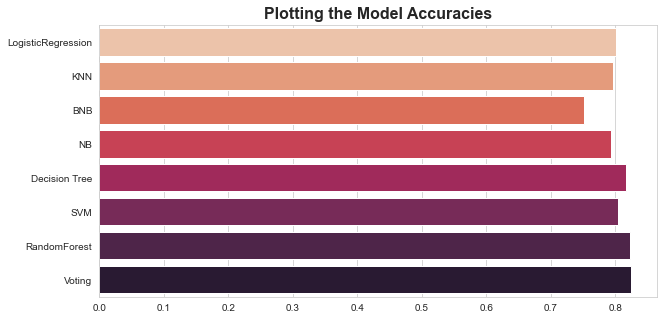

In [100]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = acc, y = name, palette='rocket_r')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

In [101]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegression,0.791878,0.821053,0.801061,0.806202
1,KNN,0.767773,0.852632,0.795756,0.807980
2,Multivariate Bernoulli,0.750000,0.757895,0.750663,0.753927
3,Multinomial,0.769231,0.842105,0.793103,0.804020
4,DecisionTree,0.757447,0.936842,0.816976,0.837647
5,SVC,0.768519,0.873684,0.803714,0.817734
6,RandomForest,0.766234,0.931579,0.822281,0.840855


# Identify the key features that lead to mental health problems in tech space

In [102]:
data = {'feature_names':features,'feature_importance': final.feature_importances_}
featureimp_df = pd.DataFrame(data)
featureimp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

Text(0.5, 1.0, 'Key Features')

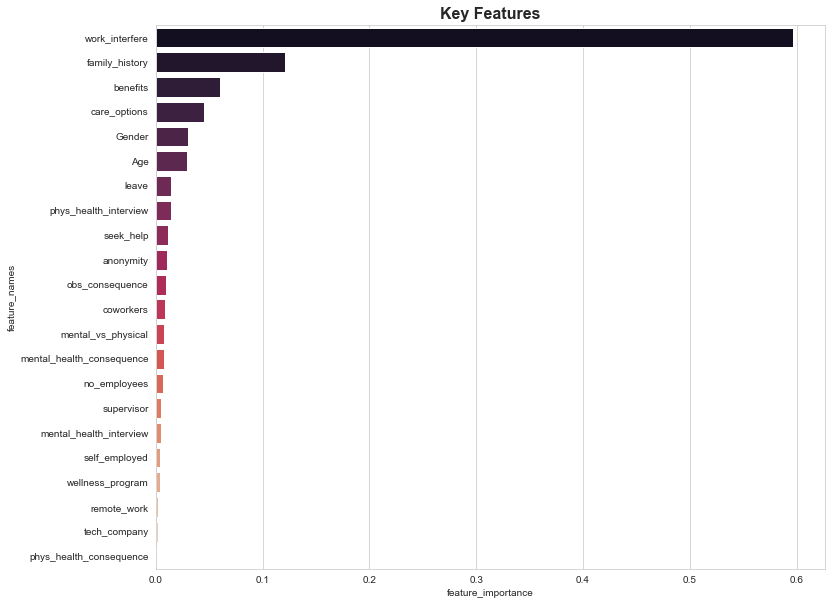

In [103]:
# I have found this method from stackoverflow for plotting feature importance easily
plt.figure(figsize=(12,10))
sns.barplot(data = featureimp_df, x = 'feature_importance' , y = 'feature_names' , palette='rocket')
plt.title("Key Features", fontsize=16, fontweight="bold")